In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label-Clean.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df

,Steming,Label
0,lupa gagal tuan rumah piala dunia mari tata se...,negatif
1,gagal helat piala dunia indonesia jadi alam de...,positif
2,citra bela palestina guna syal palestina baca ...,negatif
3,tuan rumah piala dunia bentar tuan rumah,netral
4,ketua erick thohir alas fifa batal posisi indo...,netral
...,...,...
14802,piala dunia batal gelar indonesia,netral
14803,juang indonesia tuan rumah piala dunia siasia,negatif
14804,guru indonesia tuan rumah piala dunia nasib sa...,netral
14805,main timnas indonesia ramai ramai tumpah kecew...,negatif


In [3]:
pd.value_counts(df['Label'])

negatif    6769
positif    4946
netral     3092
Name: Label, dtype: int64

## Split Dataset

In [4]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.4, 
                                                                    random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutanny

In [5]:
# Membuat data frame dari hasil split
df_train = pd.DataFrame()
df_train['Steming'] = train_X
df_train['Label'] = train_Y

df_test = pd.DataFrame()
df_test['Steming'] = test_X
df_test['Label'] = test_Y

In [6]:
#Data frame train hasil pembagian 
df_train

,Steming,Label
6764,ketua pssi erick thohir bocor sanksi fifa indo...,negatif
5969,ahy sesal indonesia batal selenggara piala dun...,netral
6541,indonesia gagal mwnjadi tuan rumah piala dunia,negatif
8101,pakar piala dunia batal ri hubung jokowimega p...,netral
3348,jalan tempuh erick thohir indonesia sukses tua...,positif
...,...,...
13123,indonesia batal tuan rumah piala dunia bukti b...,negatif
3264,piala dunia bangkit sepak bola indonesia hancu...,positif
9845,apa laksana final piala dunia laksana indonesi...,negatif
10799,klik bola gol berita kini nyata presiden jokow...,positif


In [7]:
#Data Frame test Hasil Pembagian
df_test

,Steming,Label
3017,lapang kerja potensi putar uang gera garagara ...,positif
14806,politikus budiman sudjatmiko tolak timnas isra...,positif
3299,juang erick thohir apresiasi keringat air mata...,positif
7443,arah jokowi coret ri tuan rumah piala dunia,netral
12133,batal piala dunia main politik pk mancing kepa...,netral
...,...,...
3613,presiden fifa tawa polemik tolak israel piala ...,negatif
14436,piala dunia indonesia bincang fifa hadir pasu ...,negatif
7446,hasto kristiyanto putus hiruk pikuk pro kontra...,negatif
627,pssi bicara sanksi batal helat piala dunia ni luh,netral


In [9]:
df_test.to_csv("/Users/arman/Skripsi/Dataset/Testing/data.csv")

## Pembobotan TF-IDF

In [10]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df['Steming'])
train_X_tfidf = tfidf_vect.transform(df_train['Steming'])
test_X_tfidf = tfidf_vect.transform(df_test['Steming'])

In [11]:
print(train_X_tfidf.shape)
print(test_X_tfidf.shape)

(8884, 9978)
(5923, 9978)


## Penerapan Model SVM

## Kernel Linear

In [12]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear', 
            decision_function_shape='ovr')
clf = model.fit(train_X_tfidf,train_Y)
predictions_SVM = clf.predict(test_X_tfidf)

# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

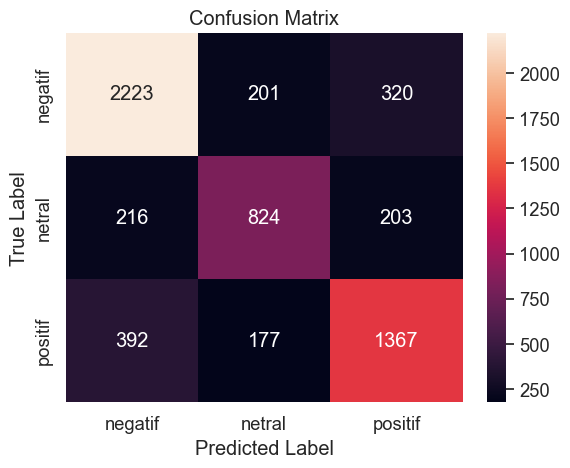

In [13]:
# Proses Pengujian
predictions_SVM = clf.predict(test_X_tfidf)

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [14]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM, average='macro'))



              precision    recall  f1-score   support

     negatif       0.79      0.81      0.80      2744
      netral       0.69      0.66      0.67      1243
     positif       0.72      0.71      0.71      1936

    accuracy                           0.75      5923
   macro avg       0.73      0.73      0.73      5923
weighted avg       0.74      0.75      0.74      5923

Accuracy of the model :  0.7452304575384096
Precision of the model:  0.7313464830217297
Recall of the model:  0.7263795151958664
F1-score of the model:  0.728700613822585


## Kernel Poly

In [15]:

#Menerapkan pemodelan SVM pada data train
modelpoly = SVC(kernel='poly', 
            decision_function_shape='ovr')
clfpoly = modelpoly.fit(train_X_tfidf,train_Y)

predictions_SVM_poly = clfpoly.predict(test_X_tfidf)

# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

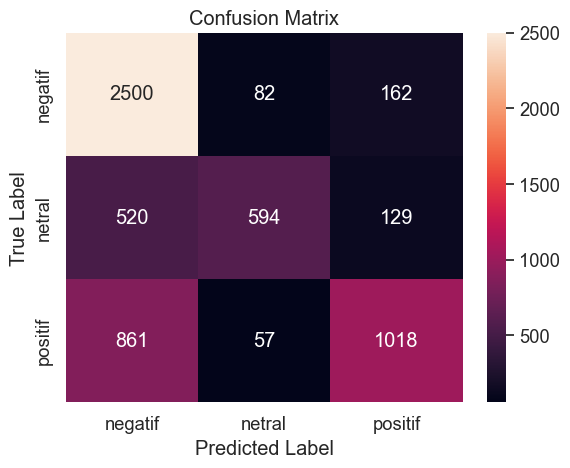

In [16]:
# Proses Pengujian
predictions_SVM_poly = clfpoly.predict(test_X_tfidf)

#menyimpan ke dalam dataframe
# test_prediction_8020_poly = pd.DataFrame()
# test_prediction_8020['Text'] = test_X
# test_prediction_8020['Label'] = predictions_SVM_8020_poly
# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_poly), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [17]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_poly))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_poly))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_poly, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_poly, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_poly, average='macro'))



              precision    recall  f1-score   support

     negatif       0.64      0.91      0.75      2744
      netral       0.81      0.48      0.60      1243
     positif       0.78      0.53      0.63      1936

    accuracy                           0.69      5923
   macro avg       0.74      0.64      0.66      5923
weighted avg       0.72      0.69      0.68      5923

Accuracy of the model :  0.6942427823737971
Precision of the model:  0.7440750399598289
Recall of the model:  0.638260423225616
F1-score of the model:  0.6611194555028396


## Kernel RBF

In [18]:

#Menerapkan pemodelan SVM pada data train
modelRBF = SVC(kernel='rbf', 
            decision_function_shape='ovr')
clfRBF = modelRBF.fit(train_X_tfidf,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

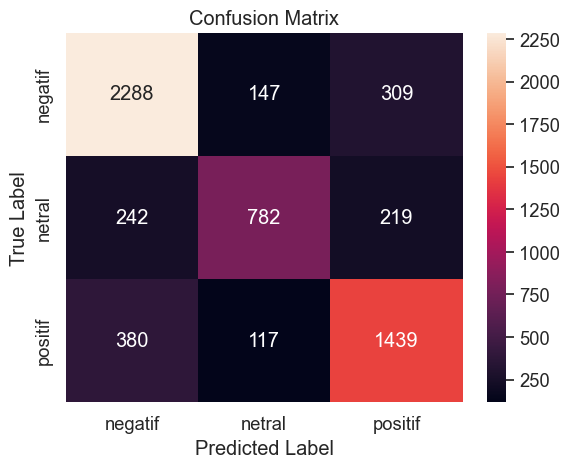

In [19]:
# Proses Pengujian
predictions_SVM_RBF = clfRBF.predict(test_X_tfidf)

#menyimpan ke dalam dataframe
# test_prediction_8020_poly = pd.DataFrame()
# test_prediction_8020['Text'] = test_X
# test_prediction_8020['Label'] = predictions_SVM_8020_poly
# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_RBF), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [20]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_RBF))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_RBF))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_RBF, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_RBF, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_RBF, average='macro'))



              precision    recall  f1-score   support

     negatif       0.79      0.83      0.81      2744
      netral       0.75      0.63      0.68      1243
     positif       0.73      0.74      0.74      1936

    accuracy                           0.76      5923
   macro avg       0.76      0.74      0.74      5923
weighted avg       0.76      0.76      0.76      5923

Accuracy of the model :  0.7612696268782712
Precision of the model:  0.755145052784763
Recall of the model:  0.7354091517498432
F1-score of the model:  0.7433292751146028


In [21]:
print("Accuracy of the model RBF : ", accuracy_score(test_Y, predictions_SVM_RBF))
print("Accuracy of the model POLY: ", accuracy_score(test_Y, predictions_SVM_poly))
print("Accuracy of the model LINEAR: ", accuracy_score(test_Y, predictions_SVM))

Accuracy of the model RBF :  0.7612696268782712
Accuracy of the model POLY:  0.6942427823737971
Accuracy of the model LINEAR:  0.7452304575384096


## Membandingkan Label dan Label SVM

In [56]:
dp = pd.read_csv("/Users/arman/Skripsi/Dataset/Testing/data.csv")
dp = dp.drop(labels="Unnamed: 0", axis=1)

In [57]:
dp['Label-svm-linear'] = predictions_SVM_poly
dp['Label-svm-poly'] = predictions_SVM
dp['Label-svm-rbf'] = predictions_SVM_RBF

In [58]:
dp

,Steming,Label,Label-svm-linear,Label-svm-poly,Label-svm-rbf
0,lapang kerja potensi putar uang gera garagara ...,positif,negatif,positif,positif
1,politikus budiman sudjatmiko tolak timnas isra...,positif,negatif,negatif,negatif
2,juang erick thohir apresiasi keringat air mata...,positif,positif,positif,positif
3,arah jokowi coret ri tuan rumah piala dunia,netral,positif,netral,netral
4,batal piala dunia main politik pk mancing kepa...,netral,negatif,negatif,negatif
5,polemik piala dunia masyarakat tidak salah,positif,positif,positif,positif
6,ganjar pranowo aku kecewa indonesia batal tuan...,negatif,negatif,negatif,negatif
7,ahy sesal indonesia batal selenggara piala dun...,positif,positif,positif,positif
8,kepo salah gagal indonesia tuan rumah piala du...,netral,negatif,negatif,negatif
9,sekjen sedih fifa coret indonesia tuan rumah p...,negatif,negatif,negatif,negatif
